Modelo Deep Learning Generacion de Texto.

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numpy import array
from pickle import dump
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

In [ ]:
# load document
in_filename = '/content/The Republic by Plato.txt'
doc = load_doc(in_filename)
print(doc[:200])

BOOK I.

I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in what


In [ ]:

import string

# turn a doc into clean tokens
def clean_doc(doc):
 # replace '--' with a space ' '
 doc = doc.replace('--', ' ')
 # split into tokens by white space
 tokens = doc.split()
 # remove punctuation from each token
 table = str.maketrans('', '', string.punctuation)
 tokens = [w.translate(table) for w in tokens]
 # remove remaining tokens that are not alphabetic
 tokens = [word for word in tokens if word.isalpha()]
 # make lower case
 tokens = [word.lower() for word in tokens]
 return tokens

In [ ]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
 data = '\n'.join(lines)
 file = open(filename, 'w')
 file.write(data)
 file.close()

In [ ]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['book', 'i', 'i', 'went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'ariston', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'bendis', 'the', 'thracian', 'artemis', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival', 'which', 'was', 'a', 'new', 'thing', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants', 'but', 'that', 'of', 'the', 'thracians', 'was', 'equally', 'if', 'not', 'more', 'beautiful', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus', 'chanced', 'to', 'catch', 'sight', 'of', 'us', 'from', 'a', 'distance', 'as', 'we', 'were', 'starting', 'on', 'our', 'way', 'home', 'and', 'told', 'his', 'servant', 'to', 'run', 'and', 'bid',

In [ ]:

# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
 # select sequence of tokens
 seq = tokens[i-length:i]
 # convert into a line
 line = ' '.join(seq)
 # store
 sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 118633


In [ ]:
# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

Entrenamos el Modelo de Lenguaje

In [ ]:
# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

Codificacion de la sequencia

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [ ]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

Entradas y Salidas Sequenciales

In [ ]:

# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

Ajusteamos el modelo

In [ ]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            370500    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7410)              748410    
                                                                 
Total params: 1,269,810
Trainable params: 1,269,810
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=80)

Epoch 1/80
927/927 [==============================] - 27s 20ms/step - loss: 6.1468 - accuracy: 0.0730
Epoch 2/80
927/927 [==============================] - 18s 19ms/step - loss: 5.6890 - accuracy: 0.1078
Epoch 3/80
927/927 [==============================] - 22s 24ms/step - loss: 5.4597 - accuracy: 0.1294
Epoch 4/80
927/927 [==============================] - 17s 18ms/step - loss: 5.3285 - accuracy: 0.1408
Epoch 5/80
927/927 [==============================] - 17s 19ms/step - loss: 5.2110 - accuracy: 0.1508
Epoch 6/80
927/927 [==============================] - 19s 21ms/step - loss: 5.1128 - accuracy: 0.1575
Epoch 7/80
927/927 [==============================] - 16s 17ms/step - loss: 5.0259 - accuracy: 0.1619
Epoch 8/80
927/927 [==============================] - 15s 16ms/step - loss: 4.9482 - accuracy: 0.1655
Epoch 9/80
927/927 [==============================] - 15s 16ms/step - loss: 4.8777 - accuracy: 0.1691
Epoch 10/80
927/927 [==============================] - 15s 16ms/step - loss: 4.802

In [ ]:
# Guardar el modelo en un archivo
model.save('model.h5')
# Guardar el tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

Ahora que hemos entrenado este modelo, lo vamos a usar para generar nuevas sequencias de texto.

In [ ]:

# Carga del documento en memoria
def load_doc(filename):
 # Abrimos el documento solo para lectura
 file = open(filename, 'r')
 # Leemos todo el documento
 text = file.read()
 # Cerramos el documento
 file.close()
 return text

# Cargamos las sequencias de texto limpias
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

In [ ]:
seq_length = len(lines[0].split()) - 1

In [ ]:
from keras.models import load_model
# Cargamos el modelo
model = load_model('model.h5')

In [ ]:
from pickle import load
# Cargamos el tokenizador
tokenizer = load(open('tokenizer.pkl', 'rb'))

Generacion de Texto.
  El primer paso es obtener un valor entrada semilla.

In [ ]:
from random import randint
# Seleccionamos la semilla para el texto
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

with other arts any more than the art of the pilot is to be confused with the art of medicine because the health of the pilot may be improved by a sea voyage you would not be inclined to say would you that navigation is the art of medicine at least



In [ ]:
#Codificacion del tokenizador
encoded = tokenizer.texts_to_sequences([seed_text])[0]

In [ ]:
predict_x=model.predict(X)
classes_x=np.argmax(predict_x,axis=1)

3708/3708 [==============================] - 17s 5ms/step


In [ ]:
#Prediccion de probabildiad de cada palabra.
yhat = model.predict_classes(encoded, verbose=0)

AttributeError: ignored

In [ ]:
out_word = ''
for word, index in tokenizer.word_index.items():
 if index == yhat:
 out_word = word
 break

In [ ]:
encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')

In [ ]:
# Generamos una secuencia desde un modelo de lenguaje.
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
 result = list()
 in_text = seed_text
 # Genarcion de un numero fijo de palabras.
 for _ in range(n_words):
 # Codificamos el texto como numero entero
 encoded = tokenizer.texts_to_sequences([in_text])[0]
 # Truncamos las secuencias a una longitud fija
 encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
 # Prediccion de probabilidades para cada palabra
 yhat = model.predict_classes(encoded, verbose=0)
 # Mapeo de palabras predecidas.
 out_word = ''
 for word, index in tokenizer.word_index.items():
 if index == yhat:
 out_word = word
 break
 # Agregamos al valor de entrada
 in_text += ' ' + out_word
 result.append(out_word)
 return ' '.join(result)

In [ ]:
# Generamos nuevo texto
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

Se puede ver que el texto parece razonable. De hecho, la adición de concatenación ayudaría a interpretar la semilla y el texto generado. Sin embargo, el texto generado obtiene el tipo correcto de palabras en el orden correcto.


In [ ]:
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from random import randint

# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
 result = list()
 in_text = seed_text
 # generate a fixed number of words
 for _ in range(n_words):
 # encode the text as integer
 encoded = tokenizer.texts_to_sequences([in_text])[0]
 # truncate sequences to a fixed length
 encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
 # predict probabilities for each word
 yhat = model.predict_classes(encoded, verbose=0)
 # map predicted word index to word
 out_word = ''
 for word, index in tokenizer.word_index.items():
 if index == yhat:
 out_word = word
 break
 # append to input
 in_text += ' ' + out_word
 result.append(out_word)
 return ' '.join(result)

# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model.h5')

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense, Dropout, Activation, Add, Concatenate, Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D, MaxPool2D, Flatten, BatchNormalization
from keras import regularizers
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils, to_categorical
from keras.datasets import cifar10

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

Una vez se importan las librerias respectivas, se procede a cargar el data set del CIFAR10.
Primero se procedera a construir el autoencoder convulocional con los parametros 'standar', es decir con los vistos en clases para poder determinar el performance.

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [ ]:
# Normalizacion de pixeles
x_train, x_test = x_train/ 255.0, x_test / 255.0

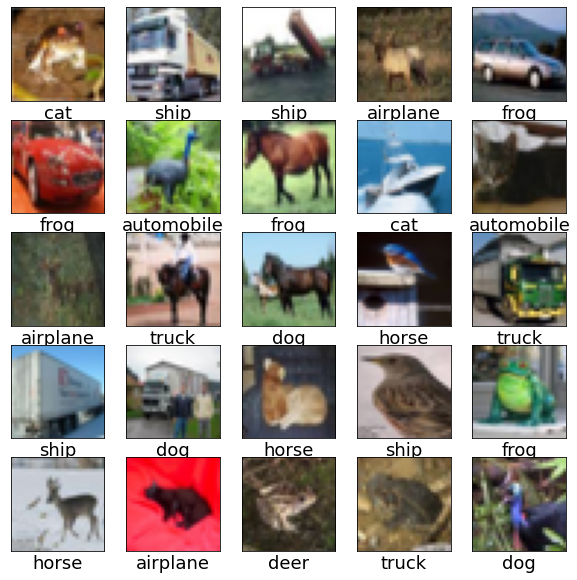

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[_[i][0]])
plt.show()

In [ ]:
print('Dimensionalidad de las imagenes del set de entrenamiento: ', x_train.shape)
print('Dimensionalidad de las imagenes del set de testeo: ', x_test.shape)
print('Dimensionalidad de las etiquetas del set de entrenamiento: ', _.shape)
print('Dimensionalidad de las etiquetass del set de testeo: ', _.shape)

Dimensionalidad de las imagenes del set de entrenamiento:  (50000, 32, 32, 3)
Dimensionalidad de las imagenes del set de testeo:  (10000, 32, 32, 3)
Dimensionalidad de las etiquetas del set de entrenamiento:  (10000, 1)
Dimensionalidad de las etiquetass del set de testeo:  (10000, 1)


In [ ]:
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
x_train.dtype, x_test.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
#Convirtamos nuestros datos en tipo float 32
x_trains = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
np.max(x_train), np.max(x_test)

(1.0, 1.0)

Construccion del modelo

In [ ]:
batch_size = 128
epochs = 60
inChannel = 3
x,y= 32,32
input = Input(shape=(x,y,inChannel))

In [ ]:
input = Input(shape=(32, 32, 3))

Autoencoder Convolucional para el CIFAR10

In [ ]:
# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)

# Autoencoder model
autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          4624  

In [ ]:
modelo1 = autoencoder.fit(x_train,x_train,
           epochs = 30,
           batch_size = 120,
           validation_data = (x_test, x_test))

Epoch 1/30
417/417 [==============================] - 16s 20ms/step - loss: 0.6565 - accuracy: 0.4164 - val_loss: 0.6083 - val_accuracy: 0.3991
Epoch 2/30
417/417 [==============================] - 7s 18ms/step - loss: 0.6082 - accuracy: 0.4220 - val_loss: 0.6038 - val_accuracy: 0.3653
Epoch 3/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6091 - accuracy: 0.4017 - val_loss: 0.6355 - val_accuracy: 0.2671
Epoch 4/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6094 - accuracy: 0.4247 - val_loss: 0.6050 - val_accuracy: 0.4285
Epoch 5/30
417/417 [==============================] - 7s 18ms/step - loss: 0.6103 - accuracy: 0.4361 - val_loss: 0.6075 - val_accuracy: 0.4134
Epoch 6/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6031 - accuracy: 0.4349 - val_loss: 0.5996 - val_accuracy: 0.4774
Epoch 7/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5960 - accuracy: 0.4430 - val_loss: 0.5947 - val_accuracy: 0.441

Visualicemos perdida

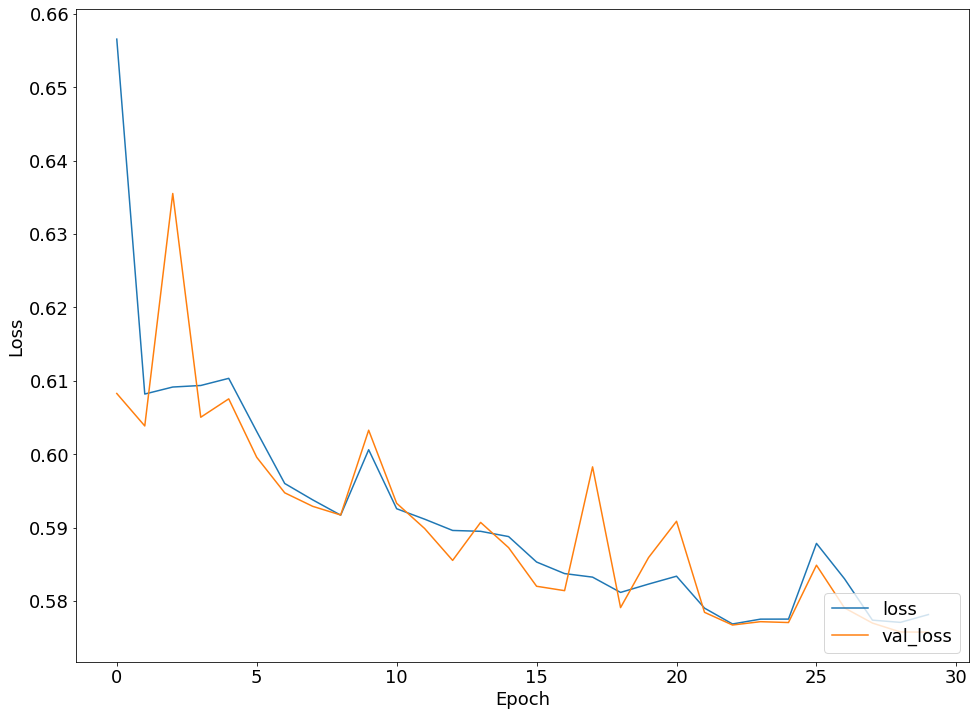

In [ ]:
plt.plot(modelo1.history['loss'], label='loss')
plt.plot(modelo1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

Visualicemos los aciertos y errores

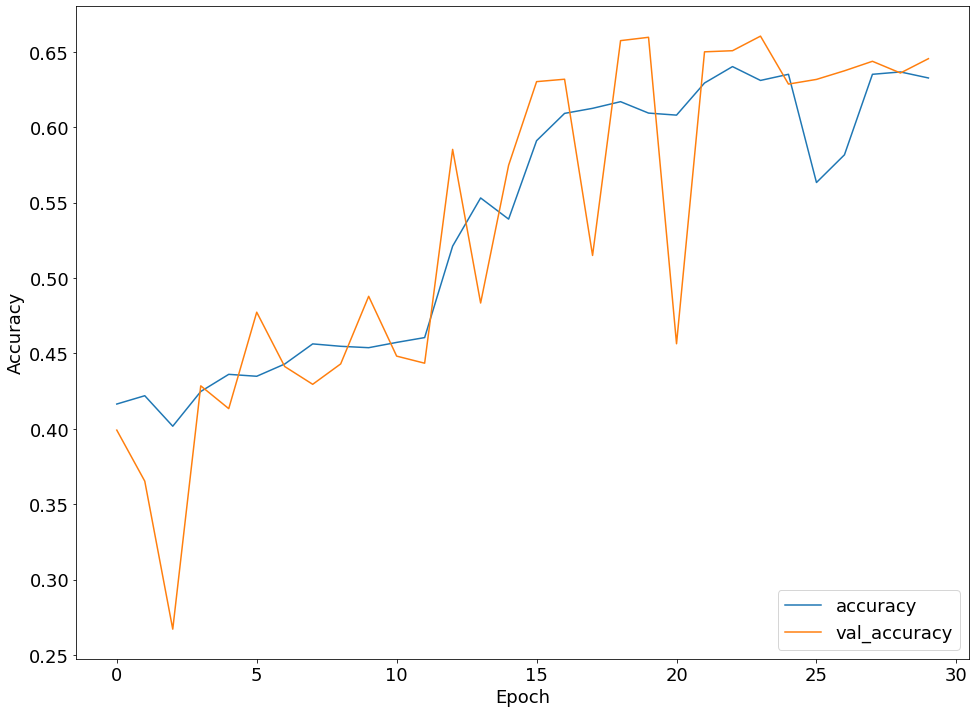

In [ ]:
plt.plot(modelo1.history['accuracy'], label='accuracy')
plt.plot(modelo1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
decoded_imgs = autoencoder(x_test[:25])

Veamos la reconstruccion

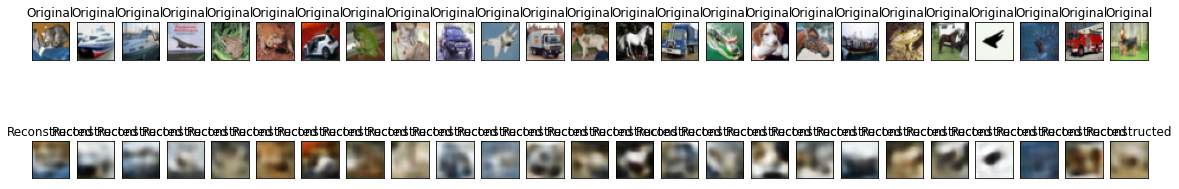

In [ ]:
n = 25
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Ahora hagamos un análisis de sensibilidad.
Aqui procederemos a modificar los filtros y el padding.

Una buena idea seria cambiando los valores de padding ya que los pixeles de las esquinas no contribuyen en la misma magnitud que otros pixeles ubicados en diferentes areas.

Trabajaremos con un in stride de 2 en la capa del encoded en el cuello de botella

In [ ]:
# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), 2)(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)

# Autoencoder model
autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 8, 8, 16)          4624

In [ ]:
modelo2 = autoencoder.fit(x_train,x_train,
           epochs = 30,
           batch_size = 120,
           validation_data = (x_test, x_test))

Epoch 1/30
417/417 [==============================] - 16s 19ms/step - loss: 0.6477 - accuracy: 0.4092 - val_loss: 0.6114 - val_accuracy: 0.2942
Epoch 2/30
417/417 [==============================] - 7s 16ms/step - loss: 0.6067 - accuracy: 0.4110 - val_loss: 0.6021 - val_accuracy: 0.4425
Epoch 3/30
417/417 [==============================] - 7s 16ms/step - loss: 0.6011 - accuracy: 0.4260 - val_loss: 0.5970 - val_accuracy: 0.3793
Epoch 4/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5997 - accuracy: 0.4304 - val_loss: 0.6022 - val_accuracy: 0.4866
Epoch 5/30
417/417 [==============================] - 7s 16ms/step - loss: 0.5983 - accuracy: 0.4445 - val_loss: 0.5933 - val_accuracy: 0.4415
Epoch 6/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5935 - accuracy: 0.5142 - val_loss: 0.5905 - val_accuracy: 0.6113
Epoch 7/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5890 - accuracy: 0.5916 - val_loss: 0.5880 - val_accuracy: 0.616

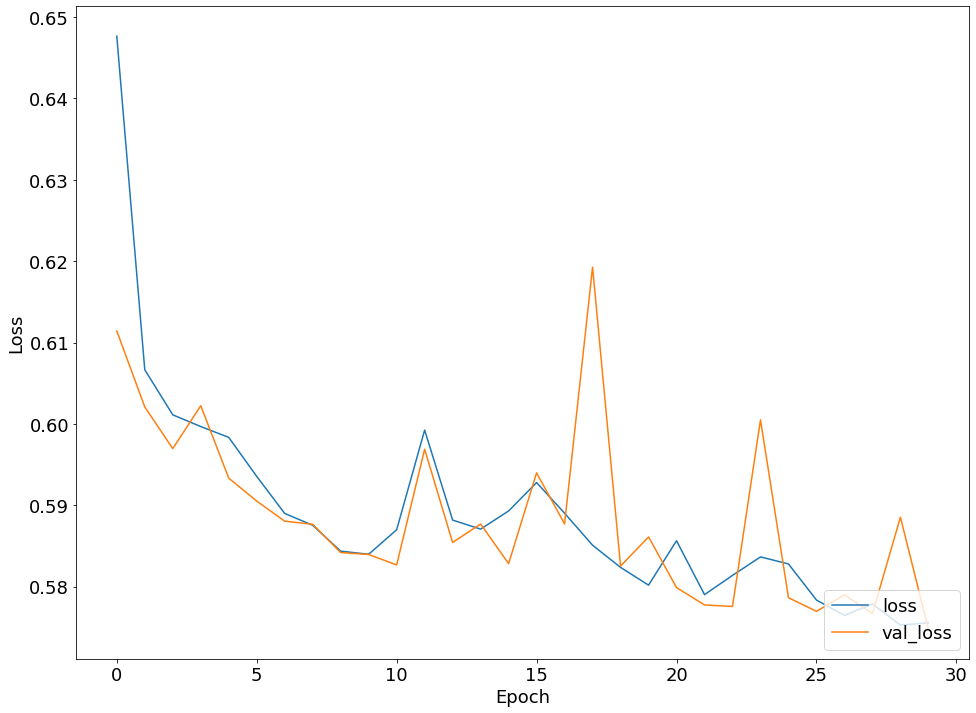

In [ ]:
plt.plot(modelo2.history['loss'], label='loss')
plt.plot(modelo2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


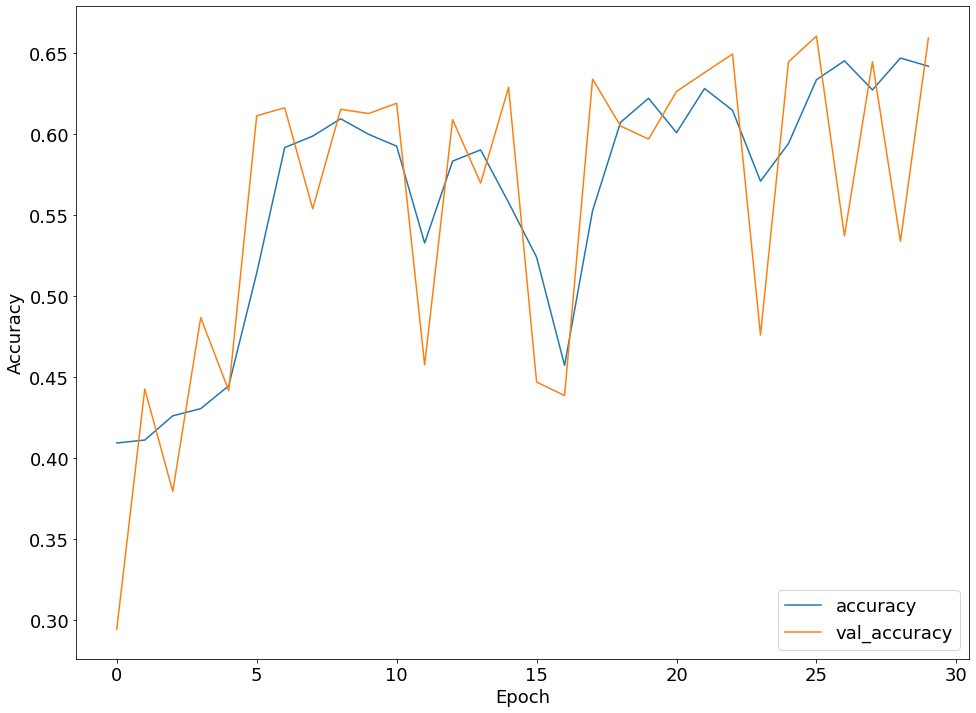

In [ ]:
plt.plot(modelo2.history['accuracy'], label='accuracy')
plt.plot(modelo2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


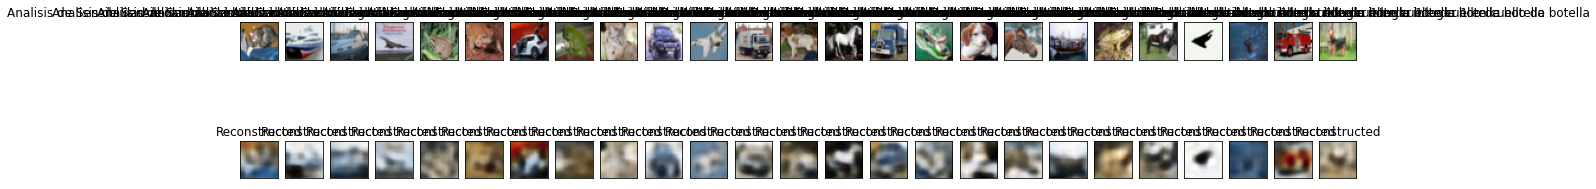

In [ ]:
decoded_imgs = autoencoder(x_test[:25])

n = 25
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Analisis de Sensiblidad al cambiar el stride de none a integer 1 en cuello de botella", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


En este analisis de sensibilidad, probaremos haciendo uso del average pooling

In [ ]:
from keras.layers.pooling.average_pooling2d import AveragePooling2D
# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = AveragePooling2D((2, 2))(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)


In [ ]:
autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 16)          4624

In [ ]:
modelo3 = autoencoder.fit(x_train,x_train,
           epochs = 30,
           batch_size = 120,
           validation_data = (x_test, x_test))


Epoch 1/30
417/417 [==============================] - 8s 18ms/step - loss: 0.6967 - accuracy: 0.4119 - val_loss: 0.6122 - val_accuracy: 0.4694
Epoch 2/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6151 - accuracy: 0.4287 - val_loss: 0.6161 - val_accuracy: 0.3016
Epoch 3/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6024 - accuracy: 0.4368 - val_loss: 0.5989 - val_accuracy: 0.4373
Epoch 4/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5987 - accuracy: 0.4542 - val_loss: 0.6010 - val_accuracy: 0.5058
Epoch 5/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5965 - accuracy: 0.4690 - val_loss: 0.5919 - val_accuracy: 0.4859
Epoch 6/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5916 - accuracy: 0.5401 - val_loss: 0.5898 - val_accuracy: 0.6052
Epoch 7/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5906 - accuracy: 0.5826 - val_loss: 0.5916 - val_accuracy: 0.6035

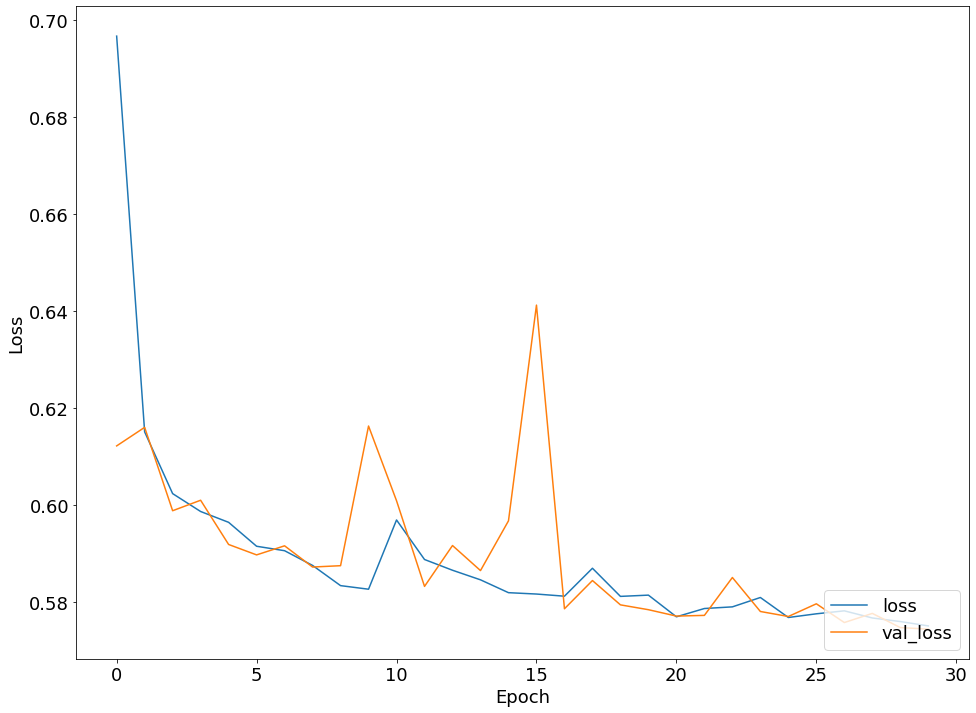

In [ ]:
plt.plot(modelo3.history['loss'], label='loss')
plt.plot(modelo3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

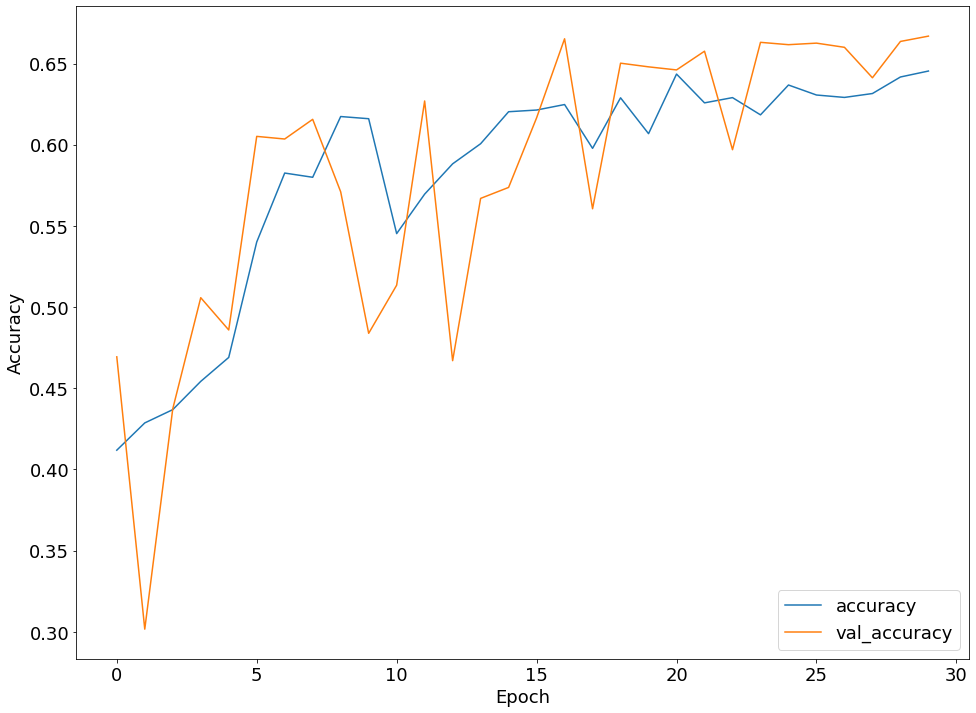

In [ ]:
plt.plot(modelo3.history['accuracy'], label='accuracy')
plt.plot(modelo3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


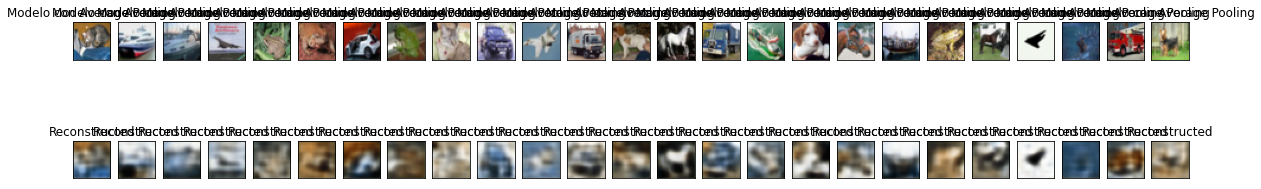

In [ ]:
decoded_imgs = autoencoder(x_test[:25])

n = 25
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Modelo con Average Pooling", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



Con AveragePooling y Stride de 2

In [ ]:
from keras.layers.pooling.average_pooling2d import AveragePooling2D

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = AveragePooling2D((2, 2), 2)(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), padding='same')(x)

autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_103 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 8, 8, 16)          462

In [ ]:
modelo4 = autoencoder.fit(x_train,x_train,
           epochs = 30,
           batch_size = 120,
           validation_data = (x_test, x_test))


Epoch 1/30
417/417 [==============================] - 9s 18ms/step - loss: 0.6538 - accuracy: 0.4270 - val_loss: 0.6059 - val_accuracy: 0.4022
Epoch 2/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6000 - accuracy: 0.4495 - val_loss: 0.5967 - val_accuracy: 0.4788
Epoch 3/30
417/417 [==============================] - 7s 17ms/step - loss: 0.6188 - accuracy: 0.4517 - val_loss: 0.6048 - val_accuracy: 0.3760
Epoch 4/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5953 - accuracy: 0.5320 - val_loss: 0.6000 - val_accuracy: 0.5146
Epoch 5/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5977 - accuracy: 0.4832 - val_loss: 0.5943 - val_accuracy: 0.3990
Epoch 6/30
417/417 [==============================] - 7s 17ms/step - loss: 0.5909 - accuracy: 0.5238 - val_loss: 0.5863 - val_accuracy: 0.6072
Epoch 7/30
417/417 [==============================] - 7s 18ms/step - loss: 0.5864 - accuracy: 0.5996 - val_loss: 0.5870 - val_accuracy: 0.5885

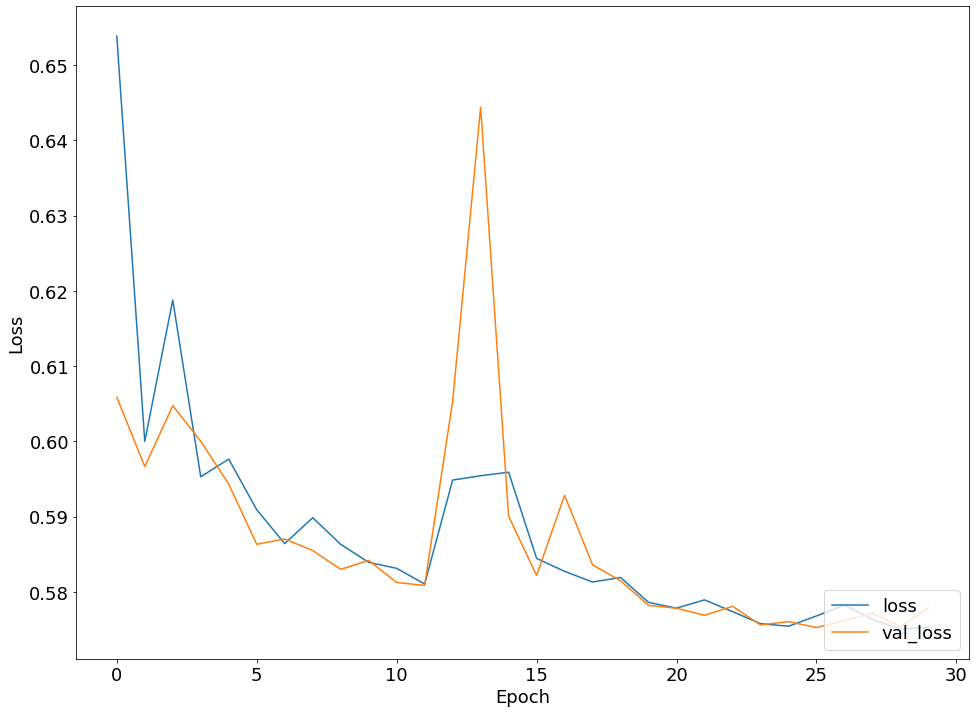

In [ ]:
plt.plot(modelo4.history['loss'], label='loss')
plt.plot(modelo4.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


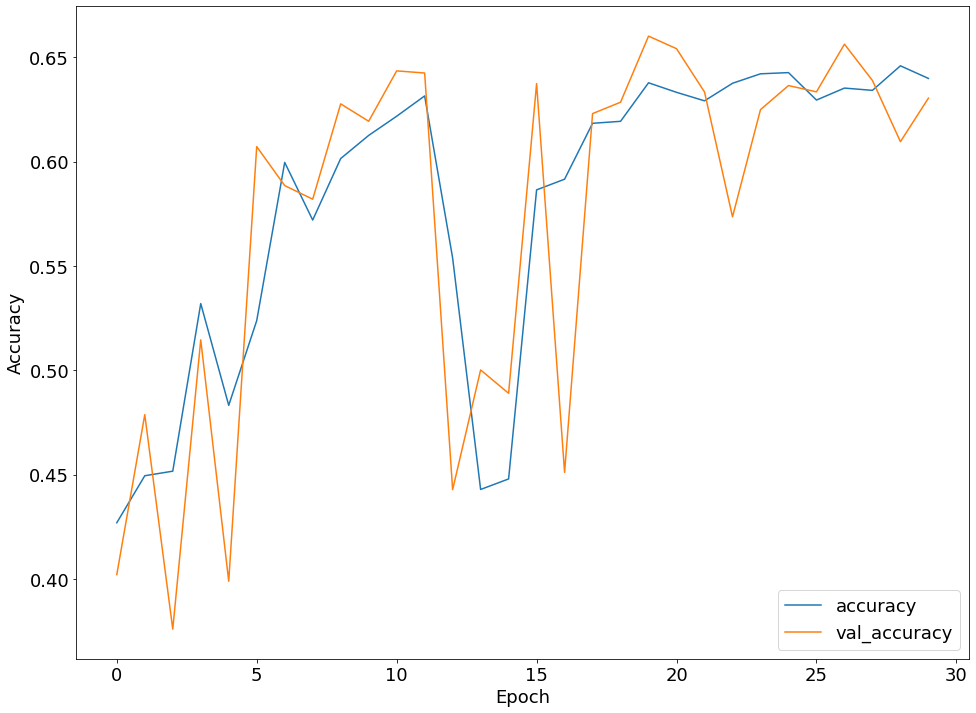

In [ ]:
plt.plot(modelo4.history['accuracy'], label='accuracy')
plt.plot(modelo4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


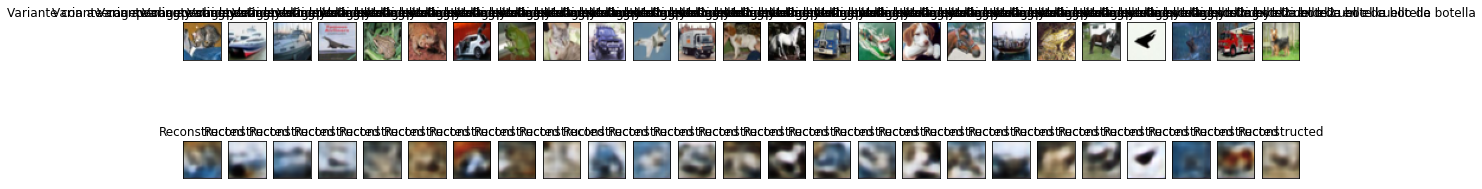

In [ ]:
decoded_imgs = autoencoder(x_test[:25])

n = 25
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Variante con averagepooling y stride de2  en el cuello de botella", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed", fontsize=12)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Como hemos visto, despues del analisis de sensibilidad vemos que la perdida y los aciertos tienden a mostrar un rendimiento similar, en donde los mas palpable es la presencia de fuertes fluctuaciones en algunas versiones.

1.B. Transferencia: utilice el encoder del autoencoder entrenado en el ıtem anterior como extractor de caracterısticas, evalu´andolo junto con algun clasificador en el set cats vs dogs. Explore el esquema de transferencia
que considere mas adecuado (directa o finetuning), considerando tecnicas para disminuir el overfitting. Compare estos resultados con los de usar como extractor de caracterısticas una red preentrenada en ImageNet.

2. Generacion de texto: basandose en los ejemplos disponibles en el sitio del curso, construya un generador de
texto que reciba como entrada palabras. Pruebe al menos dos de los siguientes tres esquemas para manejar las
entradas y compare los resultados entre ellos: i) sin word embedding (solo un vector one-hot), ii) con aprendizaje
de word embedding (una capa de embedding que recibe un vector one-hot y se conecta luego con una capa
recurrent), y iii) con word embedding preentrenado.


Vamos primero a desarrollar un generador de texto sin el uso del word embedding

In [ ]:
#Importamos las librerias necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import sys

In [ ]:

# Carga de la base de datos del texto las aventuras de alicia en el pais de las maravilla-Alice's adventures in wonderland by Lewi Carroll
filename = "wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [ ]:
# Creacion de mapa de conversion de caracteristicas a numeros enteros
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Caracteristicas: ", n_chars)
print("Total Vocabulario: ", n_vocab)

Total Caracteristicas:  144010
Total Vocabulario:  47


In [ ]:
# Preparacion de la base de datos desde los pares inputs hacia los pares outputs codificados con numeros enteros.
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
 seq_in = raw_text[i:i + seq_length]
 seq_out = raw_text[i + seq_length]
 dataX.append([char_to_int[char] for char in seq_in])
 dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  143910


In [ ]:
# reajuste de  X [muestra, pasos temporales, caracteristicas]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalizacion
X = X / float(n_vocab)
# one hot para codificar la variable output
y = to_categorical(dataY)

In [ ]:
# Modelazion tomando en cuenta al Long Short Term Memory
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Define del checkpoint. Aqui iremos notificando los pesos de la red para cada que se de
# una reduccion en la funcion de perdida al final de cada epoca.
# Se usara el mejor conjunto de pesos (menor perdida) para instanciar el modelo de
#generacion de texto en las proximas secciones.
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
#Ajustamos el modelo a los datos con un numero pequeño de epocas (30) y un batch size de 128
model.fit(X, y, epochs=30, batch_size=128, callbacks=callbacks_list)

Epoch 1/30
1123/1125 [============================>.] - ETA: 0s - loss: 3.0267
Epoch 1: loss improved from inf to 3.02649, saving model to weights-improvement-01-3.0265.hdf5
1125/1125 [==============================] - 20s 13ms/step - loss: 3.0265
Epoch 2/30
1123/1125 [============================>.] - ETA: 0s - loss: 2.8342
Epoch 2: loss improved from 3.02649 to 2.83412, saving model to weights-improvement-02-2.8341.hdf5
1125/1125 [==============================] - 14s 12ms/step - loss: 2.8341
Epoch 3/30
1122/1125 [============================>.] - ETA: 0s - loss: 2.7317
Epoch 3: loss improved from 2.83412 to 2.73152, saving model to weights-improvement-03-2.7315.hdf5
1125/1125 [==============================] - 14s 13ms/step - loss: 2.7315
Epoch 4/30
1124/1125 [============================>.] - ETA: 0s - loss: 2.6543
Epoch 4: loss improved from 2.73152 to 2.65425, saving model to weights-improvement-04-2.6543.hdf5
1125/1125 [==============================] - 15s 13ms/step - loss: 2.6

In [ ]:
#Generacion de texto con LSTM
# Carga de los pesos en funcion de la menor perdida.
filename = "weights-improvement-30-1.7950.hdf5" #Aqui ponemos el valor de mejora del ultimo epoch
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Creacion de mapeo inverso que se puede usar para convertir de regreso a los nuemros
# enteros de regreso hacia caracteres para que una persona pueda entender la prediccion.
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# Eleccion de una semilla al azar
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generacion de caracteres
for i in range(1000):
 x = np.reshape(pattern, (1, len(pattern), 1))
 x = x / float(n_vocab)
 prediction = model.predict(x, verbose=0)
 index = np.argmax(prediction)
 result = int_to_char[index]
 seq_in = [int_to_char[value] for value in pattern]
 sys.stdout.write(result)
 pattern.append(index)
 pattern = pattern[1:len(pattern)]
print("\nDone.")

Seed:
" for she could
not remember ever having seen such a thing.

after a while, finding that nothing more  "
the rabbit wish al il  shet ior hoe soeez doene on the taali. 
“he doerst iave you wan i toeee oo the s then toe was to tore, and tou den ier aee  ih a martle of the sabbit with an il, she was a little boo anl aroinen the while wab
inte fertein the was aooih the white rabbit, and she whrt hn tasled to herself “ou on her head!” the said to herself, and she sar aooinged to the thoee she was thing the sabl to her her hnad that hl was she har hn the canes. and she west on in a cew arpiuiitg toiee 
“ih you can’t thing io the saye theeg oo the samd tiieg to then. and the master was the matter woth a lottee of the sabli in the was of diered her hands, and the was qottiig to hirs that the was aolieg to her oo the saalit asdht, and she was aoate io an and  that io the madt hf the cates and the catespiller, and she was qoini to her to tork the thite  as the was toi flan the rabbit was t

Ahora provemos con un LSTM mas largo

In [ ]:
#Añadimos una segunda capa
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
#Cambiamos levemente los nombres de los pesos para poder determinar la diferencia
# entre este modelo y el anterior.
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
#Cambiamos el batch size de 128 a 64 y enumero de epocas la incrementamos a 40
model.fit(X, y, epochs=40, batch_size=64, callbacks=callbacks_list)

Epoch 1/40
2248/2249 [============================>.] - ETA: 0s - loss: 2.8381
Epoch 1: loss improved from inf to 2.83804, saving model to weights-improvement-01-2.8380-bigger.hdf5
2249/2249 [==============================] - 42s 17ms/step - loss: 2.8380
Epoch 2/40
2247/2249 [============================>.] - ETA: 0s - loss: 2.4408
Epoch 2: loss improved from 2.83804 to 2.44058, saving model to weights-improvement-02-2.4406-bigger.hdf5
2249/2249 [==============================] - 39s 18ms/step - loss: 2.4406
Epoch 3/40
2248/2249 [============================>.] - ETA: 0s - loss: 2.2331
Epoch 3: loss improved from 2.44058 to 2.23302, saving model to weights-improvement-03-2.2330-bigger.hdf5
2249/2249 [==============================] - 40s 18ms/step - loss: 2.2330
Epoch 4/40
2247/2249 [============================>.] - ETA: 0s - loss: 2.0943
Epoch 4: loss improved from 2.23302 to 2.09423, saving model to weights-improvement-04-2.0942-bigger.hdf5
2249/2249 [==============================]

In [ ]:
filename = "weights-improvement-40-1.2657-bigger.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Eleccion de la semilla
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Semilla:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")

Semilla:
"  untwist it. after a while
she remembered that she still held the pieces of mushroom in her hands,
a "


In [ ]:
for i in range(1000):
 x = np.reshape(pattern, (1, len(pattern), 1))
 x = x / float(n_vocab)
 prediction = model.predict(x, verbose=0)
 index = np.argmax(prediction)
 result = int_to_char[index]
 seq_in = [int_to_char[value] for value in pattern]
 sys.stdout.write(result)
 pattern.append(index)
 pattern = pattern[1:len(pattern)]
print("\nDone.")

nd the bame upon a little book with the bould not the sime of the thing the could go on its head to see it was an under the cook, and the think as she had never been so she shat sure a mittle book with the little good of the thing the court, and the baterpillar she was now a little thriek of the thing the shate was another fortmen, and she was going to say the sight had she began to see it was of like the time with a saie will say the sime of the table, but she was now a mong simence to see it was an under the cook, and the think as she had never been so she she went on a little book, and the thought it would be a pine was a growne and say the sight size for a minute or two she was going to see it was an under the cook, and the think as she had never been so she shat sure a mittle book with the little good of the thing the court, and the baterpillar she was now a little thriek of the thing the shate was another fortmen, and she was going to say the sight had she began to see it was of 

2. B. Word Embedding

In [ ]:
from numpy import array
from pickle import dump
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


In [ ]:
# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text


In [ ]:
# load document
in_filename = '/content/The Republic by Plato.txt'
doc = load_doc(in_filename)
print(doc[:200])


BOOK I.

I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in what


In [ ]:
import string

# turn a doc into clean tokens
def clean_doc(doc):
 # replace '--' with a space ' '
 doc = doc.replace('--', ' ')
 # split into tokens by white space
 tokens = doc.split()
 # remove punctuation from each token
 table = str.maketrans('', '', string.punctuation)
 tokens = [w.translate(table) for w in tokens]
 # remove remaining tokens that are not alphabetic
 tokens = [word for word in tokens if word.isalpha()]
 # make lower case
 tokens = [word.lower() for word in tokens]
 return tokens


In [ ]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
 data = '\n'.join(lines)
 file = open(filename, 'w')
 file.write(data)
 file.close()


In [ ]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))


['book', 'i', 'i', 'went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'ariston', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'bendis', 'the', 'thracian', 'artemis', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival', 'which', 'was', 'a', 'new', 'thing', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants', 'but', 'that', 'of', 'the', 'thracians', 'was', 'equally', 'if', 'not', 'more', 'beautiful', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus', 'chanced', 'to', 'catch', 'sight', 'of', 'us', 'from', 'a', 'distance', 'as', 'we', 'were', 'starting', 'on', 'our', 'way', 'home', 'and', 'told', 'his', 'servant', 'to', 'run', 'and', 'bid',

In [ ]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
 # select sequence of tokens
 seq = tokens[i-length:i]
 # convert into a line
 line = ' '.join(seq)
 # store
 sequences.append(line)
print('Total Sequences: %d' % len(sequences))


Total Sequences: 118633


In [ ]:
# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)


In [ ]:
# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')


In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [ ]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1


In [ ]:
# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]


In [ ]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            370500    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7410)              748410    
                                                                 
Total params: 1,269,810
Trainable params: 1,269,810
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compilacion del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Ajuste
model.fit(X, y, batch_size=128, epochs=60)

Epoch 1/60
927/927 [==============================] - 19s 13ms/step - loss: 6.1673 - accuracy: 0.0711
Epoch 2/60
927/927 [==============================] - 12s 13ms/step - loss: 5.7045 - accuracy: 0.1047
Epoch 3/60
927/927 [==============================] - 14s 15ms/step - loss: 5.4682 - accuracy: 0.1271
Epoch 4/60
927/927 [==============================] - 13s 14ms/step - loss: 5.3057 - accuracy: 0.1440
Epoch 5/60
927/927 [==============================] - 12s 13ms/step - loss: 5.1885 - accuracy: 0.1535
Epoch 6/60
927/927 [==============================] - 12s 13ms/step - loss: 5.0941 - accuracy: 0.1590
Epoch 7/60
927/927 [==============================] - 12s 13ms/step - loss: 5.0135 - accuracy: 0.1634
Epoch 8/60
927/927 [==============================] - 12s 13ms/step - loss: 4.9405 - accuracy: 0.1673
Epoch 9/60
927/927 [==============================] - 12s 13ms/step - loss: 4.8714 - accuracy: 0.1706
Epoch 10/60
927/927 [==============================] - 12s 13ms/step - loss: 4.802

In [ ]:
# Guardar el modelo en un archivo
model.save('model.h5')
# Guardar el tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))


In [ ]:
# Carga del documento en memoria
def load_doc(filename):
 # Abrimos el documento solo para lectura
 file = open(filename, 'r')
 # Leemos todo el documento
 text = file.read()
 # Cerramos el documento
 file.close()
 return text

# Cargamos las sequencias de texto limpias
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')


In [ ]:
seq_length = len(lines[0].split()) - 1

In [ ]:
from keras.models import load_model
# Cargamos el modelo
model = load_model('model.h5')


In [ ]:
from pickle import load
# Cargamos el tokenizador
tokenizer = load(open('tokenizer.pkl', 'rb'))


In [ ]:
from random import randint
# Seleccionamos la semilla para el texto
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')


be most clearly seen if we turn to that highest form of injustice in which the criminal is the happiest of men and the sufferers or those who refuse to do injustice are the most miserable that is to say tyranny which by fraud and force takes away the property of



In [ ]:
#Codificacion del tokenizador
encoded = tokenizer.texts_to_sequences([seed_text])[0]


In [ ]:
predict_x=model.predict(X)
classes_x=np.argmax(predict_x,axis=1)


3708/3708 [==============================] - 15s 4ms/step


In [ ]:
out_word = ''
for word, index in tokenizer.word_index.items():
 if index == yhat:
 out_word = word
 break


In [ ]:
encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')

In [ ]:
# Generamos una secuencia desde un modelo de lenguaje.
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
 result = list()
 in_text = seed_text
 # Genarcion de un numero fijo de palabras.
 for _ in range(n_words):
 # Codificamos el texto como numero entero
 encoded = tokenizer.texts_to_sequences([in_text])[0]
 # Truncamos las secuencias a una longitud fija
 encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
 # Prediccion de probabilidades para cada palabra
 yhat = model.predict_classes(encoded, verbose=0)
 # Mapeo de palabras predecidas.
 out_word = ''
 for word, index in tokenizer.word_index.items():
 if index == yhat:
 out_word = word
 break
 # Agregamos al valor de entrada
 in_text += ' ' + out_word
 result.append(out_word)
 return ' '.join(result)


Se puede ver que el texto parece razonable. De hecho, la adición de concatenación ayudaría a interpretar la semilla y el texto generado. Sin embargo, el texto generado obtiene el tipo correcto de palabras en el orden correcto.

In [ ]:
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from random import randint

# load doc into memory
def load_doc(filename):
 # open the file as read only
 file = open(filename, 'r')
 # read all text
 text = file.read()
 # close the file
 file.close()
 return text

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
 result = list()
 in_text = seed_text
 # generate a fixed number of words
 for _ in range(n_words):
 # encode the text as integer
 encoded = tokenizer.texts_to_sequences([in_text])[0]
 # truncate sequences to a fixed length
 encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
 # predict probabilities for each word
 yhat = model.predict_classes(encoded, verbose=0)
 # map predicted word index to word
 out_word = ''
 for word, index in tokenizer.word_index.items():
 if index == yhat:
 out_word = word
 break
 # append to input
 in_text += ' ' + out_word
 result.append(out_word)
 return ' '.join(result)

# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model.h5')

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

2.b. Con word embedding

Para crear un modelo de generación de texto con incrustación de palabras en Keras, puedes seguir estos pasos:

Preprocesar tus datos de texto tokenizándolos y creando un vocabulario.

Crear una capa de incrustación en su modelo utilizando la capa de incrustación en Keras. La capa de incrustación toma el tamaño del vocabulario y la dimensión de las incrustaciones de palabras como argumentos.

Agregar la capa de incrustación como la primera capa en su modelo.

Agregar capas adicionales, como capas LSTM o GRU, para procesar los datos de texto incrustados.

Usar una capa densa con una función de activación softmax como capa de salida para predecir la siguiente palabra en la secuencia.



# Preprocesasimiento de la data
text = "This is an example text for text generation"
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
encoded_text = tokenizer.texts_to_sequences([text])[0]

# Creacion del embedding layer
embedding_dim = 100
embedding_layer = Embedding(vocab_size, embedding_dim)

# Creacion del modelo
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100))
model.add(Dense(vocab_size, activation='softmax'))

# Compilacion y entrenamiento del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(encoded_text, epochs=100)
Please note that this is a simple example and you can add more layers, and tunning the hyperparameters for a better performance.






Pre-Trained Glove Embedding

Se trabaja en esta seccion con la base de datos glove.GB.zip la cual fue entrenada en una base de datos de 1 billon de palabras (tokens) con un vocabulario de 400 000 palabras.

Despues de descargar y desconfigurar el zip, se toma encuenta solamente el dcto llamado 'glove.6B.100d.txt', el cual contiene una version de 100 dimensiones de embedding.

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [ ]:
# definimos los documentos
docs = ['Well done!',
 'Good work',
 'Great effort',
 'nice work',
 'Excellent!',
 'Weak',
 'Poor effort!',
 'not good',
 'poor work',
 'Could have done better.']

In [ ]:
# definicion de las etiquetas
labels = array([1,1,1,1,1,0,0,0,0,0])
# preparacion del tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

In [ ]:
# Numeros enteros codifican los documentos
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# Docuemntos pad en una longitud maxima de 4 palabras
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [ ]:
#Descarga y obtencion de la base de datos
!wget http:/ /nlp.stanford.edu/data/glove.6B.zip!unzip -q glove.6B.zip
!unzip -q glove.6B.zip

unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [ ]:
# Carga del total del embedding en la memoria
embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')
for line in f:
 values = line.split()
 word = values[0]
 coefs = asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 190883 word vectors.


In [ ]:
# Creacion de la matriz de pesos para las palabras in los docuemntos en entrenamiento
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
 embedding_vector = embeddings_index.get(word)
 if embedding_vector is not None:
  embedding_matrix[i] = embedding_vector

In [ ]:
# Definicion del modelo
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilacion
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Resumen
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
None


In [ ]:
# Por ultimo, ajustamos el modelo
model.fit(padded_docs, labels, epochs=50, verbose=0)
# Evaluamos el modelo
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


En la práctica, se recomienda experimentar con el aprendizaje de un word embedding utilizando un pretrained embedding que sea fija e intente realizar el aprendizaje sobre el modelo pre entrenado.

Finalmente y como ejercicio extra, se procede ha trabajar con un modelo embeddig.

In [ ]:
from numpy import array
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [ ]:
# definimos los documentos
docs = ['Well done!',
 'Good work',
 'Great effort',
 'nice work',
 'Excellent!',
 'Weak',
 'Poor effort!',
 'not good',
 'poor work',
 'Could have done better.']


In [ ]:
# definicion de las etiquetas
labels = array([1,1,1,1,1,0,0,0,0,0])
# Numeros enteros codifican el documento
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[15, 25], [24, 43], [38, 9], [12, 43], [24], [34], [9, 9], [37, 24], [9, 43], [5, 41, 25, 49]]


In [ ]:
# Documentos pad en una longitud maxima de 4 palabras
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[15 25  0  0]
 [24 43  0  0]
 [38  9  0  0]
 [12 43  0  0]
 [24  0  0  0]
 [34  0  0  0]
 [ 9  9  0  0]
 [37 24  0  0]
 [ 9 43  0  0]
 [ 5 41 25 49]]


In [ ]:
# Definicion
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# Compilacion
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Resumen
print(model.summary())
# Ajuste
model.fit(padded_docs, labels, epochs=50, verbose=0)
# Evaluacion
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 80.000001


Se ha logrado un accuracy del 80%, el cual es muy bueno. Se podrian guardar los pesos de la capa de Embedding para usarlo posteriormente en otros modelos que posean un vocabulario similar.

3. BONUS) Traduccion entre idiomas: construya un modelo Seq2Seq que permita realizar traduccion automatica de frases, incluyendo al menos una de las siguiente dos modificaciones con respecto a los ejemplos
disponibles en el sitio del curso: i) la entrada al sistema es a nivel de palabras (no de caracteres), y ii) uso de un
mecanismo de atencion.


In [ ]:
!pip install "tensorflow-text>=2.10"
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

In [ ]:

import numpy as np

import typing
from typing import Any, Tuple

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
import tensorflow_text as tf_text

In [ ]:
#Creacion de Clase para chequeos de los pasos durante todo el procedimiento
#@title
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)

      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # Si el nombre del eje es nuevo se tiene que sumar su longitud al cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

In [ ]:
# Descarga del documento
import pathlib

path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = pathlib.Path(path_to_zip).parent/'spa-eng/spa.txt'

2638744/2638744 [==============================] - 0s 0us/step


In [ ]:
def load_data(path):
  text = path.read_text(encoding='utf-8')

  lines = text.splitlines()
  pairs = [line.split('\t') for line in lines]

  context = np.array([context for target, context in pairs])
  target = np.array([target for target, context in pairs])

  return target, context

In [ ]:
target_raw, context_raw = load_data(path_to_file)
print(context_raw[-1])

Si quieres sonar como un hablante nativo, debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un músico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado.


In [ ]:
print(target_raw[-1])

If you want to sound like a native speaker, you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo.


In [ ]:
# Creacion de una base de datos tf.data compuesta de informacion en letras
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 64

is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[is_train], target_raw[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [ ]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor(
[b'Ya nadie me viene a visitar.'
 b'Mary trabaja como enfermera a tiempo parcial.' b'Tienes vino.'
 b'El aire acondicionado est\xc3\xa1 estropeado.'
 b'Tom at\xc3\xb3 a Mary a la silla.'], shape=(5,), dtype=string)

tf.Tensor(
[b'No one comes to visit me anymore.' b'Mary works part-time as a nurse.'
 b'You have wine.' b'The air conditioner is out of order.'
 b'Tom tied Mary to the chair.'], shape=(5,), dtype=string)


Procesamiento de Texto.
 Todo el procesamiento de texto se da dentro del contexto del modelo, haciendo uso de la funcion layers.TextVectorization.

In [ ]:
#Estandardizacion.
# El modelo trata con texto multilingüe con un vocabulario limitado.
# Por lo tanto, será importante estandarizar el texto de entrada.
# El primer paso es la normalización de Unicode para dividir los caracteres
# acentuados y reemplazar los caracteres de compatibilidad con sus equivalentes ASCII.
# El paquete tensorflow_text contiene una operación de normalización Unicode:

example_text = tf.constant('¿Todavía está en casa?')

print(example_text.numpy())
print(tf_text.normalize_utf8(example_text, 'NFKD').numpy())

b'\xc2\xbfTodav\xc3\xada est\xc3\xa1 en casa?'
b'\xc2\xbfTodavi\xcc\x81a esta\xcc\x81 en casa?'


In [ ]:
# La normalización de Unicode será el primer
# paso en la función de estandarización de texto

def tf_lower_and_split_punct(text):
  # Split accented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [ ]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

¿Todavía está en casa?
[START] ¿ todavia esta en casa ? [END]


Vectorizacion del Texto.
 Esta función de estandarización estará envuelta en una capa tf.keras.layers.TextVectorization que manejará la extracción de vocabulario y la conversión del texto de entrada a secuencias de tokens.

In [ ]:
max_vocab_size = 5000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

In [ ]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Las primeras 10 palabras del vocabulario:
context_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'que', 'de', 'el', 'a', 'no']

Esa es la capa de TextVectorization en español, ahora construye y .adapt() la de inglés:

In [ ]:
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
target_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'the', 'i', 'to', 'you', 'tom']

In [ ]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]

<tf.RaggedTensor [[2, 87, 114, 18, 334, 8, 707, 4, 3],
 [2, 31, 522, 38, 2126, 8, 62, 3219, 4, 3], [2, 94, 217, 4, 3]]>

In [ ]:
# El método get_vocabulary se puede usar para convertir las ID de los tokens en texto:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] ya nadie me viene a visitar . [END]'

Text(0.5, 1.0, 'Mask')

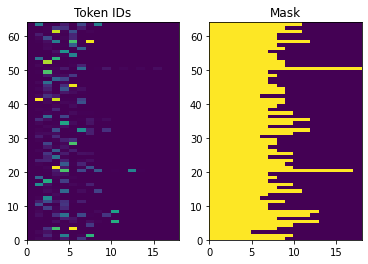

In [ ]:
# Los ID de token devueltos se rellenan con ceros.
# Esto se puede convertir fácilmente en una máscara:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title('Mask')

Procesamiento de la base de datos.
 La función process_text a continuación convierte los conjuntos de datos de cadenas en tensores de ID de token con relleno 0. También convierte de un par (contexto, destino) a un par ((contexto, destino_entrada), destino_salida) para entrenar con keras.Model.fit. Keras espera pares (entradas, etiquetas), las entradas son (contexto, target_in) y las etiquetas son target_out. La diferencia entre target_in y target_out es que se desplazan un paso entre sí, de modo que en cada ubicación la etiqueta es el siguiente token.

In [ ]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

In [ ]:

for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy())
  print()
  print(ex_tar_in[0, :10].numpy())
  print(ex_tar_out[0, :10].numpy())

[   2    7 1318    8   11 4747    6   29    1    4]

[   2   13 3706    7   47  887   36   10 1262    4]
[  13 3706    7   47  887   36   10 1262    4    3]


The enconder/decoder.

In [ ]:
# Antes de entrar en él, defina constantes para el modelo:
UNITS = 256

El objetivo del codificador es procesar la secuencia de contexto en una secuencia de vectores que son útiles para el decodificador cuando intenta predecir la siguiente salida para cada paso de tiempo. Dado que la secuencia de contexto es constante, no hay restricciones sobre cómo puede fluir la información en el codificador, así que use un RNN bidireccional para realizar el procesamiento.

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units

    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [ ]:
# Codificar la primera sencuencia de entrada.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')

Context tokens, shape (batch, s): (64, 16)
Encoder output, shape (batch, s, units): (64, 16, 256)


La capa de atención permite que el decodificador acceda a la información extraída por el codificador. Calcula un vector de la secuencia de contexto completa y lo agrega a la salida del decodificador.

La forma más sencilla de calcular un solo vector de toda la secuencia sería tomar el promedio de la secuencia (layers.GlobalAveragePooling1D). Una capa de atención es similar, pero calcula un promedio ponderado en la secuencia de contexto. Donde los pesos se calculan a partir de la combinación de vectores de contexto y de "consulta".

In [ ]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()

    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
        query=x,
        value=context,
        return_attention_scores=True)

    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')

    # Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [ ]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                  output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')

Context sequence, shape (batch, s, units): (64, 16, 256)
Target sequence, shape (batch, t, units): (64, 17, 256)
Attention result, shape (batch, t, units): (64, 17, 256)
Attention weights, shape (batch, t, s):    (64, 17, 16)


In [ ]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ], dtype=float32)

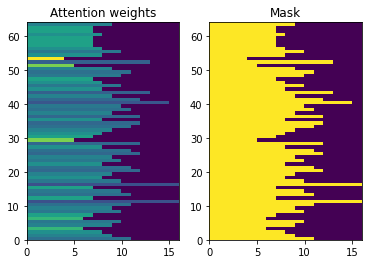

In [ ]:
# Estos son los pesos de atención en las secuencias de contexto en t=0:
attention_weights = attention_layer.last_attention_weights
mask=(ex_context_tok != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask');


Decoder.
 El trabajo del decodificador es generar predicciones para el próximo token en cada ubicación en la secuencia objetivo.
  
  Resumimos las acciones del decoder:
- Busca incrustaciones para cada token en la secuencia de destino.
- Utiliza un RNN para procesar la secuencia de destino y realizar un seguimiento de lo que ha generado hasta el momento.
- Utiliza la salida RNN como la "consulta" a la capa de atención, cuando atiende la salida del codificador.
- En cada ubicación de la salida, predice el siguiente token.

In [ ]:
# Aquí está el inicializador de la clase Decoder.
# El inicializador crea todas las capas necesarias.
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)


In [ ]:
#Entrenamiento
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits

In [ ]:
# Instancia de decoder para testeo
decoder = Decoder(target_text_processor, UNITS)

Dado el contexto y los tokens de destino, para cada token de destino predice el próximo token de destino.

In [ ]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (64, 16, 256)
input target tokens shape: (batch, t) (64, 17)
logits shape shape: (batch, target_vocabulary_size) (64, 17, 5000)


Inferencia
Para usarlo para inferencia, se necesitará un par de métodos más:


In [ ]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [ ]:
@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

In [ ]:
@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True)

  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)

  return next_token, done, state

Con esas funciones adicionales, puede escribir un ciclo de generación:

In [ ]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()

array([b'realistic sounded lie campus pulling earthquakes closer crushed address onions',
       b'meal slices find letting uncle proper frightened farmer shouldnt difficulties',
       b'engineer blind enjoying bosss photo calm stroke listen heres doctor'],
      dtype=object)

Ahora que se cuenta con todos los componentes del modelo, hay que combínarlos para crear el modelo para el entrenamiento.

In [ ]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy.
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

In [ ]:
model = Translator(UNITS, context_text_processor, target_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (64, 16)
Target tokens, shape: (batch, t) (64, 17)
logits, shape: (batch, t, target_vocabulary_size) (64, 17, 5000)


Para el entrenamiento, se desea implementar propias funciones de precisión y pérdida enmascarada:

In [ ]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [ ]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)

    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)

    return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
#Configuramos el modelo para entrenamiento
model.compile(optimizer='adam',
              loss=masked_loss,
              metrics=[masked_acc, masked_loss])

In [ ]:
#Inicializacion randomica del modeló
vocab_size = 1.0 * target_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}


{'expected_loss': 8.517193, 'expected_acc': 0.0002}

In [ ]:

model.evaluate(val_ds, steps=20, return_dict=True)

20/20 [==============================] - 7s 26ms/step - loss: 8.5178 - masked_acc: 1.8282e-04 - masked_loss: 8.5178


{'loss': 8.517827987670898,
 'masked_acc': 0.00018281780648976564,
 'masked_loss': 8.517827987670898}

In [ ]:
history = model.fit(
    train_ds.repeat(),
    epochs=100,
    steps_per_epoch = 100,
    validation_data=val_ds,
    validation_steps = 20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
100/100 [==============================] - 4s 40ms/step - loss: 0.8729 - masked_acc: 0.8005 - masked_loss: 0.8729 - val_loss: 1.2336 - val_masked_acc: 0.7476 - val_masked_loss: 1.2336
Epoch 2/100
100/100 [==============================] - 4s 40ms/step - loss: 0.9141 - masked_acc: 0.7910 - masked_loss: 0.9141 - val_loss: 1.1952 - val_masked_acc: 0.7610 - val_masked_loss: 1.1952
Epoch 3/100
100/100 [==============================] - 4s 39ms/step - loss: 0.8992 - masked_acc: 0.7939 - masked_loss: 0.8992 - val_loss: 1.2333 - val_masked_acc: 0.7452 - val_masked_loss: 1.2333
Epoch 4/100
100/100 [==============================] - 5s 45ms/step - loss: 0.9201 - masked_acc: 0.7879 - masked_loss: 0.9201 - val_loss: 1.2151 - val_masked_acc: 0.7547 - val_masked_loss: 1.2151
Epoch 5/100
100/100 [==============================] - 5s 50ms/step - loss: 0.9256 - masked_acc: 0.7881 - masked_loss: 0.9256 - val_loss: 1.1615 - val_masked_acc: 0.7609 - val_masked_loss: 1.1615
Epoch 6/100
100/100 

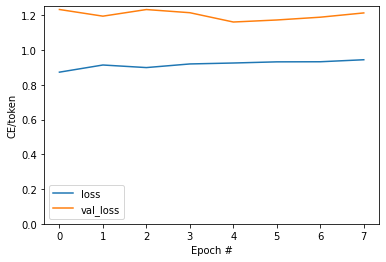

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

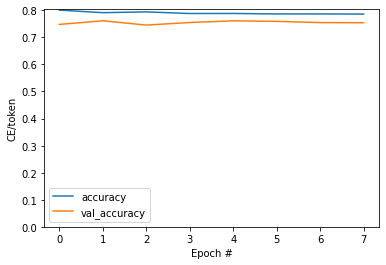

In [ ]:
# Variacion del nivel de accuracy en funcion del numero de epocas
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

Traduccion.
 Ahora que el modelo está entrenado, implemente una función para ejecutar el texto completo => traducción de texto.

In [ ]:
#@title
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)

    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)

    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

Estos son los dos métodos de ayuda, utilizados anteriormente, para convertir tokens en texto y obtener el siguiente token:

In [ ]:
result = model.translate(['¿Todavía está en casa?']) # Are you still home
result[0].numpy().decode()

'are you still at home ? '

In [ ]:
# Generacion del plot de atencion.
#@title
@Translator.add_method
def plot_attention(self, text, **kwargs):
  assert isinstance(text, str)
  output = self.translate([text], **kwargs)
  output = output[0].numpy().decode()

  attention = self.last_attention_weights[0]

  context = tf_lower_and_split_punct(text)
  context = context.numpy().decode().split()

  output = tf_lower_and_split_punct(output)
  output = output.numpy().decode().split()[1:]

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + output, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')

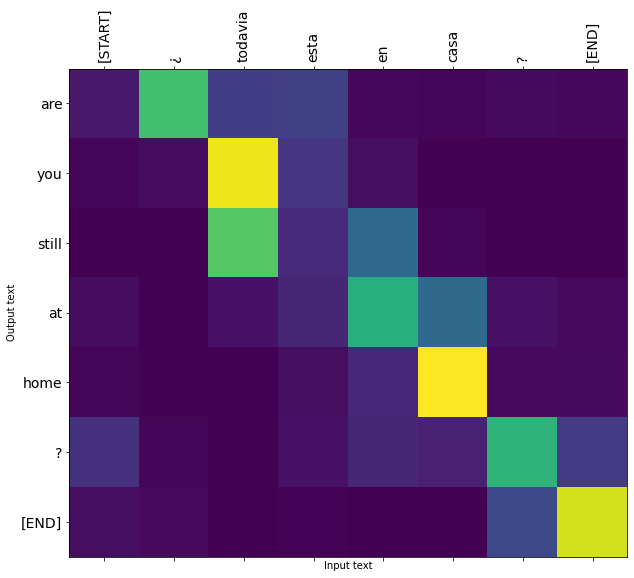

In [ ]:
model.plot_attention('¿Todavía está en casa?') # Are you still home

CPU times: user 220 ms, sys: 5.53 ms, total: 226 ms
Wall time: 229 ms


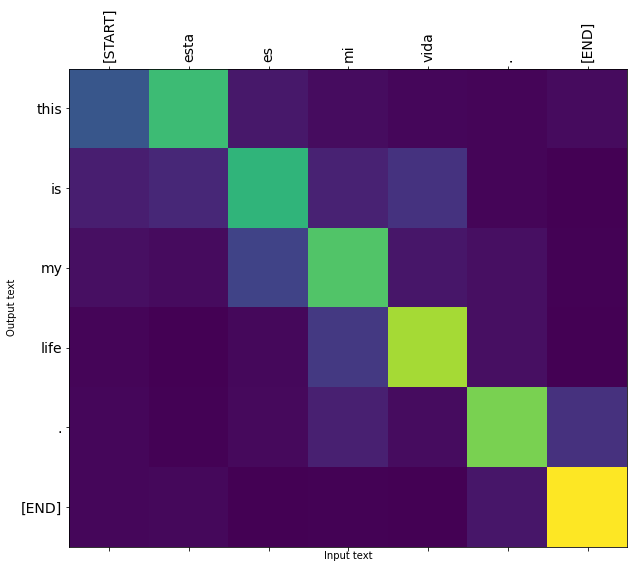

In [ ]:
# Traducion de unas cuentas oraciones y su graficacion.

%%time
# This is my life.
model.plot_attention('Esta es mi vida.')

CPU times: user 221 ms, sys: 2.15 ms, total: 223 ms
Wall time: 220 ms


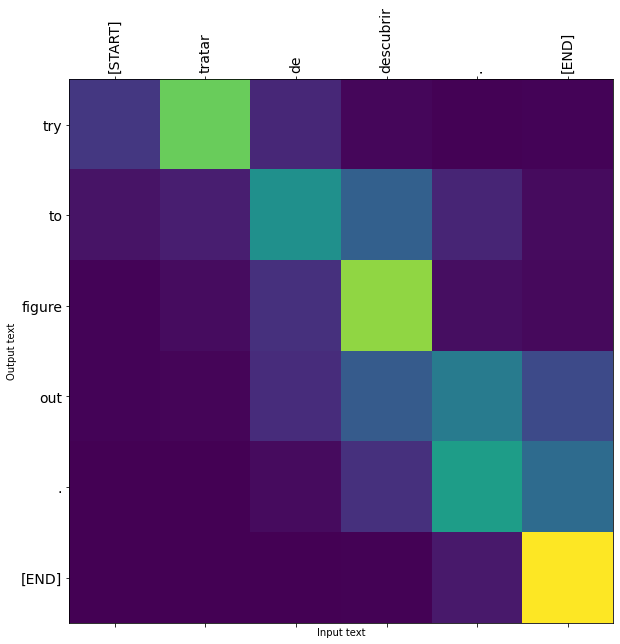

In [ ]:
%%time
 # Try to find out.'
model.plot_attention('Tratar de descubrir.')

Los datos sin procesar se ordenan por longitud, así que intente traducir la secuencia más larga:

In [ ]:
long_text = context_raw[-1]

import textwrap
print('Salida Esperada:\n', '\n'.join(textwrap.wrap(target_raw[-1])))

Salida Esperada:
 If you want to sound like a native speaker, you must be willing to
practice saying the same sentence over and over in the same way that
banjo players practice the same phrase over and over until they can
play it correctly and at the desired tempo.


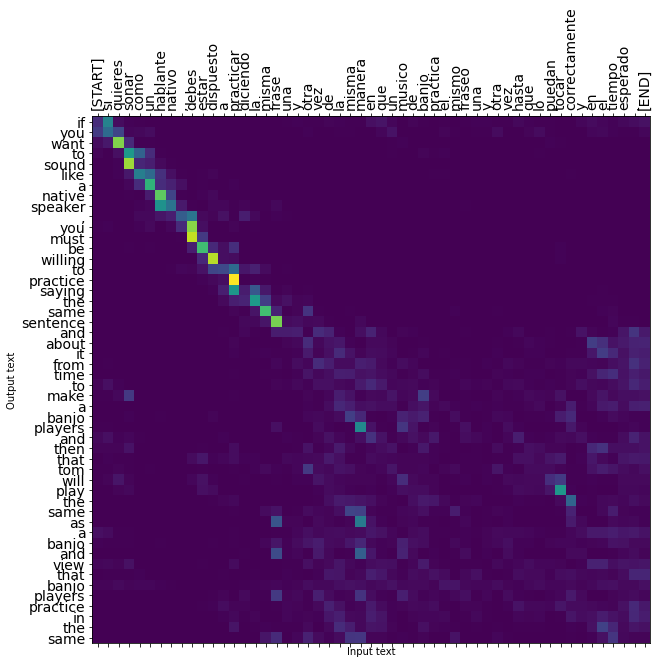

In [ ]:
model.plot_attention(long_text)

La función de traducción funciona en lotes, por lo que si tiene varios textos para traducir, se puede pasarlos todos a la vez, lo que es mucho más eficiente que traducirlos uno a la vez:

In [ ]:
inputs = [
    'Hace mucho frio aqui.', # "It's really cold here."
    'Esta es mi vida.', # "This is my life."
    'Su cuarto es un desastre.' # "His room is a mess"
]

In [ ]:
%%time
for t in inputs:
  print(model.translate([t])[0].numpy().decode())

print()

its a cold cold here . 
this is my life . 
her room is a mess . 

CPU times: user 629 ms, sys: 12.5 ms, total: 642 ms
Wall time: 641 ms


In [ ]:
%%time
result = model.translate(inputs)

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print()

its a cold cold here . 
this is my life .  
her room is a mess . 

CPU times: user 237 ms, sys: 8.23 ms, total: 245 ms
Wall time: 245 ms


Entonces, en general, esta función de traducción de texto en su mayor parte ha realizado correctamente su trabajo, hace bien el trabajo.